# Titanic Data Analysis By Gangadhara Naga Sai

## Overview Of Titanic Dataset
   In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its    passengers and crew. In this project, we will explore the RMS Titanic passenger manifest to determine whether someone survived or did not survive.Demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic Dataset is obtained from kaggle (https://www.kaggle.com/c/titanic/data).



## Questions

*  Depending upon weather the passengers survived or did not survive based on the classification of
  * Age
  * Gender
  * Passenger class
  
  Shows difference in survival chances of Each indiviudal?


## Data Wrangling 

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display

%matplotlib inline

# Load the dataset
files = 'titanic_data.csv'
data_titanic = pd.read_csv(files)
display(data_titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Description
From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Variable Notes

pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


In [2]:

data =data_titanic

# Show the dataset 
display(data.head())
data.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


From the above info(),We can see columns Age, Cabin and Embarked have missing values.

Handling the missing values:
   >Ignore the rows with missing data,
   
   >Exclude the variable at all or we might substite it with  mean or median.
    
 Age  80% of the data is available,which seems a important variable so not to exclude.
 
 Port of embarkation doesn't seem interesting.
 
 cabin 23% of the data so decided to exclude.
 
 PassengerId,Name,fare doesnt seem to contribute to any survival investigation


In [3]:
#exculding some coloumns
del data['Ticket']
del data['Cabin']
del data['Embarked']
del data['Name']
del data['PassengerId']
del data['Fare']


In [4]:
data.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch
count,891.000000,891.000000,891,714.000000,891.000000,891.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,male,NaN,NaN,NaN
freq,NaN,NaN,577,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000


In [5]:
# Calculate number of missing values
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [6]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch
count,891.000000,891.000000,891,891.000000,891.000000,891.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,male,NaN,NaN,NaN
freq,NaN,NaN,577,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594
std,0.486592,0.836071,NaN,13.002015,1.102743,0.806057
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000
50%,0.000000,3.000000,NaN,29.699118,0.000000,0.000000
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000


We can see that all columns have identical length.

## Data Exploration and Visualization

In [7]:
data_s=data
survival_group = data_s.groupby('Survived')
survival_group.describe()

Age       Parch      Pclass       SibSp
Survived                                                      
0        count  549.000000  549.000000  549.000000  549.000000
         mean    30.415100    0.329690    2.531876    0.553734
         std     12.457370    0.823166    0.735805    1.288399
         min      1.000000    0.000000    1.000000    0.000000
         25%     23.000000    0.000000    2.000000    0.000000
         50%     29.699118    0.000000    3.000000    0.000000
         75%     35.000000    0.000000    3.000000    1.000000
         max     74.000000    6.000000    3.000000    8.000000
1        count  342.000000  342.000000  342.000000  342.000000
         mean    28.549778    0.464912    1.950292    0.473684
         std     13.772498    0.771712    0.863321    0.708688
         min      0.420000    0.000000    1.000000    0.000000
         25%     21.000000    0.000000    1.000000    0.000000
         50%     29.699118    0.000000    2.000000    0.000000
         75%     35.000000    1.000000    3.000000    1.000000
         max     80.000000    5.000000    3.000000    4.000000

From the above statistics
- Youngest to survive: 0.42 
- Youngest to die: 1.0 
- Oldest to survive: 80.0 
- Oldest to die: 74.0




In [8]:
#  Seriously i dont understand why age is 0.42
data_s[data_s['Age'] < 1]

,Survived,Pclass,Sex,Age,SibSp,Parch
78,1,2,male,0.83,0,2
305,1,1,male,0.92,1,2
469,1,3,female,0.75,2,1
644,1,3,female,0.75,2,1
755,1,2,male,0.67,1,1
803,1,3,male,0.42,0,1
831,1,2,male,0.83,1,1


These must be new borns and all survived

In [9]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set style for all graphs
#sns.set_style("light")
#sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

In [10]:
# sns.factorplot('Age', 'Sex' ,hue = 'Survived', data = data, kind = 'bar')
# sns.factorplot('Pclass','Survived', data = data, kind = 'bar')
# sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = data, kind = 'bar')



Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

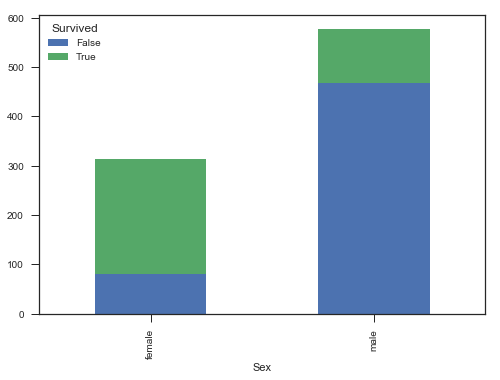

In [11]:
## GENDER
survivals = pd.crosstab([ data_s.Sex], data_s.Survived.astype(bool))
survivals.plot(kind='bar', stacked=True)
survival = data_s.groupby('Sex')['Survived']
survival.mean()

Female Survival rate : 74.2%

Male Survival rate: 18.8%

               Survived        Age     SibSp     Parch
Sex    Pclass                                         
female 1       0.968085  34.141405  0.553191  0.457447
       2       0.921053  28.748661  0.486842  0.605263
       3       0.500000  24.068493  0.895833  0.798611
male   1       0.368852  39.287717  0.311475  0.278689
       2       0.157407  30.653908  0.342593  0.222222
       3       0.135447  27.372153  0.498559  0.224784


,Survived,Age,SibSp,Parch
Pclass,,,,
1,0.629630,37.048118,0.416667,0.356481
2,0.472826,29.866958,0.402174,0.380435
3,0.242363,26.403259,0.615071,0.393075


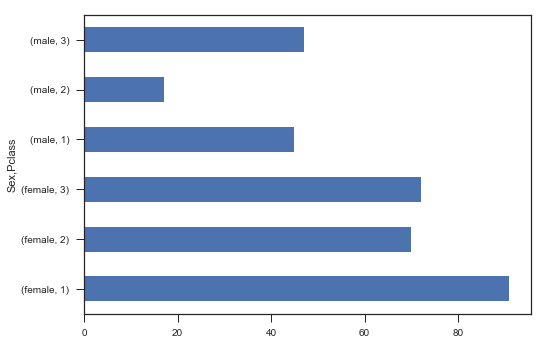

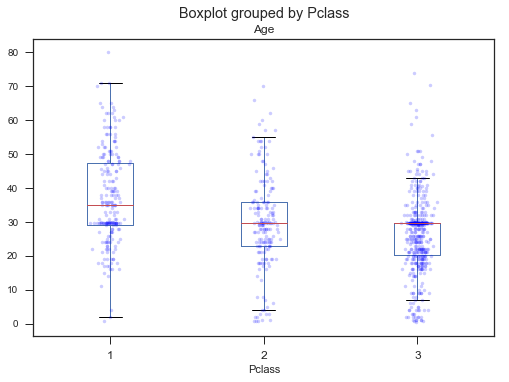

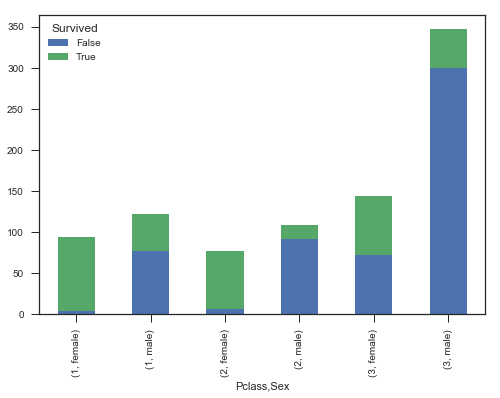

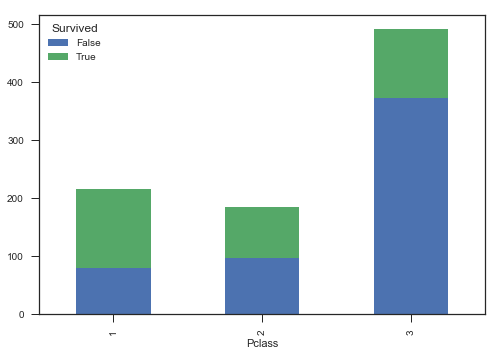

In [12]:
#PCLASS
survive=data.groupby(['Sex','Pclass'])
survive.Survived.sum().plot(kind='barh')
print(survive.mean())


bp = data.boxplot(column='Age', by='Pclass', grid=False)
for i in [1,2,3]:
    y =data.Age[data.Pclass==i].dropna()
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'b.', alpha=0.2)
    
survivals = pd.crosstab([data_s.Pclass, data_s.Sex], data_s.Survived.astype(bool))
survivals.plot(kind='bar', stacked=True)
survivals = pd.crosstab([data_s.Pclass], data_s.Survived.astype(bool))
survivals.plot(kind='bar', stacked=True)
survival=data.groupby(['Pclass'])
survival.mean()



 **A passenger from Class 1 is about 2.5x times more likely to survive than a passenger in Class 3.** 

Social-economic standing was a factor in survival rate of passengers.

- Class 1: **62.96%**
- Class 2: **47.28%**
- Class 3: **24.24%**

Social-economic standing was a factor in survival rate of passengers by gender

- Class 1 - female survival rate: 96.81%
- Class 1 - male survival rate: 36.89%

- Class 2 - female survival rate: 92.11%
- Class 2 - male survival rate: 15.74%

- Class 3 - female survival rate: 50.0%
- Class 3 - male survival rate: 13.54%

Survived    Pclass        Age     Parch
Sex    SibSp                                         
female 0      0.787356  2.183908  28.815940  0.465517
       1      0.754717  1.981132  30.581942  0.698113
       2      0.769231  2.307692  17.553778  1.230769
       3      0.363636  2.545455  20.099759  1.181818
       4      0.333333  3.000000   8.333333  2.000000
       5      0.000000  3.000000  16.000000  2.000000
       8      0.000000  3.000000  29.699118  2.000000
male   0      0.168203  2.419355  31.896441  0.073733
       1      0.310680  2.135922  29.484575  0.611650
       2      0.200000  2.400000  28.426549  0.133333
       3      0.000000  2.600000  12.939824  1.600000
       4      0.083333  3.000000   6.416667  1.250000
       5      0.000000  3.000000   8.750000  2.000000
       8      0.000000  3.000000  29.699118  2.000000

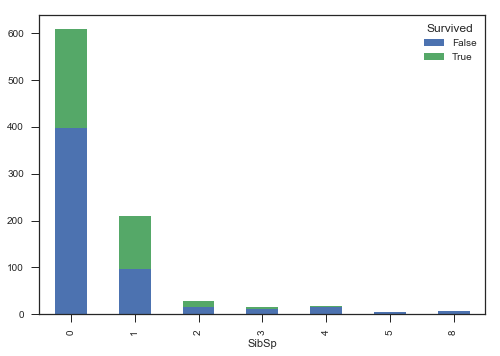

In [13]:
#SibSp
survive_s=data.groupby(['Sex','SibSp'])
survivals = pd.crosstab([data_s.SibSp], data_s.Survived.astype(bool))
survivals.plot(kind='bar', stacked=True)
survive_s.mean()

Survived
False    78.428571
True     48.857143
dtype: float64


Survived    Pclass        Age     SibSp
Sex    Parch                                         
female 0      0.788660  2.108247  30.542082  0.386598
       1      0.766667  2.133333  25.766593  0.850000
       2      0.612245  2.244898  19.691711  1.714286
       3      0.750000  2.500000  37.500000  1.000000
       4      0.000000  3.000000  37.000000  0.500000
       5      0.250000  3.000000  39.250000  0.500000
       6      0.000000  3.000000  43.000000  1.000000
male   0      0.165289  2.407025  32.030160  0.177686
       1      0.327586  2.275862  23.758920  1.327586
       2      0.322581  2.322581  18.136954  2.612903
       3      0.000000  3.000000  16.000000  1.000000
       4      0.000000  2.000000  52.000000  1.000000
       5      0.000000  3.000000  39.000000  1.000000

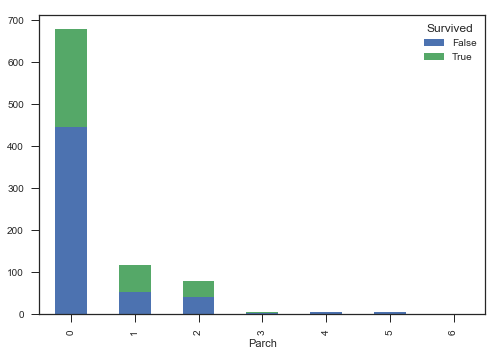

In [14]:
#Parch 
survive_p=data.groupby(['Sex','Parch'])

survivals = pd.crosstab([data_s.Parch], data_s.Survived.astype(bool))
survivals.plot(kind='bar', stacked=True)
print(survivals.mean())


survive_p.mean()


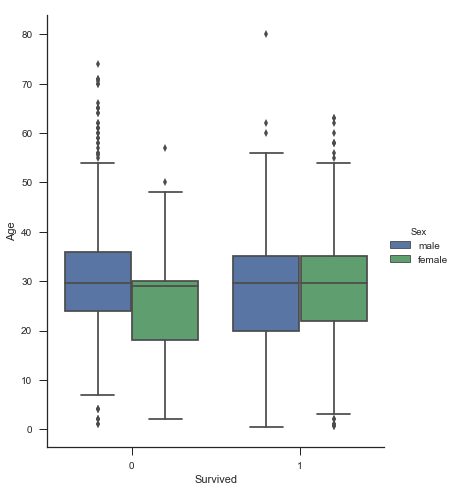

In [15]:
#Age
sns.factorplot(x="Survived", y="Age", hue='Sex', data=data_s, kind="box", size=7, aspect=.8)
# survive_A=data.groupby(['Sex','Age'])

From the above boxplot and calculated mean:
- Irrespective of sex and class, **age was not** a deciding factor in the passenger survival rate
- Average age for surived and not survived seemed almost same from the boxplot

,Survived,Pclass,Age,SibSp,Parch
group_age,,,,,
Adult,0.365079,2.288360,31.729820,0.394180,0.284392
Child,0.539823,2.584071,9.041327,1.460177,1.053097
Senior,0.227273,1.590909,66.022727,0.136364,0.272727


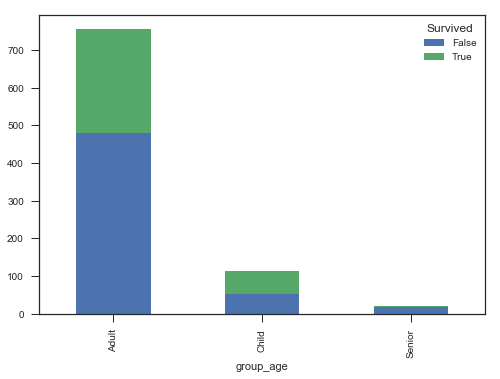

In [16]:
#Age
def grouping(age):
    if age < 18:
        return 'Child'
    elif age > 60: 
        return 'Senior'
    else:
        return 'Adult'

data['group_age'] = data['Age'].apply(grouping)    
survive_a=data.groupby(['group_age'])
survival_a = pd.crosstab([data.group_age], data_s.Survived.astype(bool))
survival_a.plot(kind='bar', stacked=True)
# sns.factorplot(x="group_age", y="Age", hue='Sex', data=data, kind="box", size=7, aspect=.8)

survive_a.mean()

These are percentage of survivors for Group_age
- Adult : **36.5%**
- Child	: **53.9%**
- Senior: **22.72%**

### Women and children have preference First to lifeboats?

In [17]:
def group(d,v):
    if (d == 'female') and (v >= 18):
        return 'Woman'
    elif v < 18:
        return 'child'                        
    elif (d == 'male') and (v >= 18): 
        return  'Man'

data['Category'] = data.apply(lambda row:group(row['Sex'], row['Age']), axis=1) 
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,group_age,Category
0,0,3,male,22.0,1,0,Adult,Man
1,1,1,female,38.0,1,0,Adult,Woman
2,1,3,female,26.0,0,0,Adult,Woman
3,1,1,female,35.0,1,0,Adult,Woman
4,0,3,male,35.0,0,0,Adult,Man


,Survived,Pclass,Age,SibSp,Parch
Category,,,,,
Man,0.165703,2.358382,32.925223,0.287091,0.142582
Woman,0.752896,2.088803,32.247310,0.586873,0.567568
child,0.539823,2.584071,9.041327,1.460177,1.053097


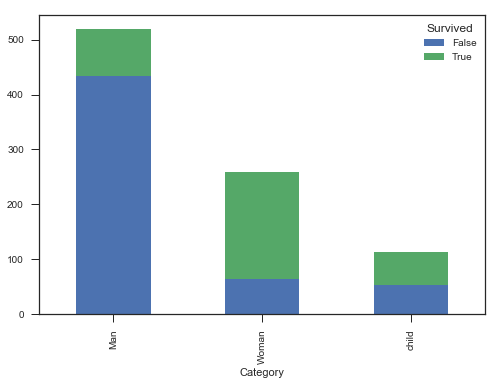

In [30]:
survival_a = pd.crosstab([data.Category], data_s.Survived.astype(bool))
survival_a.plot(kind='bar', stacked=True)

data.groupby(['Category']).mean()

Women and children are given importance in the survival of a number of people. 

- Man 16.57%
- Women 75.2%
- Child 54%

In [29]:
data.groupby(['Category',"Pclass"]).mean()


Survived        Age     SibSp     Parch
Category Pclass                                         
Man      1       0.347458  40.340521  0.305085  0.220339
         2       0.082474  33.590640  0.298969  0.134021
         3       0.121711  29.834596  0.276316  0.115132
Woman    1       0.976744  36.003396  0.558140  0.418605
         2       0.906250  32.576535  0.468750  0.515625
         3       0.486239  29.090486  0.678899  0.715596
child    1       0.916667  12.160000  0.500000  1.250000
         2       0.913043   6.623043  0.652174  1.043478
         3       0.371795   9.274615  1.846154  1.025641

## Conclusion


We observe a order of survival rate based on Age ,Sex and Class:

|children and women of upper class| 
|-----------------------------|
|children and women of middle class| 
|women of lower class|
|children of lower class |
|men of upper class|
|men of middle class|
| finally men of the lower class have least survival rate|

The analysis seems that , A female with upper social-economic standing (first class) and Children,had the best chance of survival. Age did not seem to be a major factor.Man in third class, had the lowest chance of survival. Women and children of all classes, were mostly having a higher survival rate than men in general. 

**Limitations:**
- Part men and women were missing Age data and were replaced with mean as calculations which could have skewed.


## References

- https://www.kaggle.com/c/titanic/data
- http://nbviewer.jupyter.org/gist/fonnesbeck/5850463
- https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.factorplot.html#seaborn.factorplot
- http://seaborn.pydata.org/index.html